In [1]:
import numpy as np
import pandas as pd
from spykes.plot.neurovis import NeuroVis
from spykes.plot.popvis import PopVis
import matplotlib.pyplot as plt
import fklab.signals.multitaper as mt
import scipy.signal
import fklab.signals.filter

%matplotlib notebook

plt.style.use('seaborn-ticks')

In [5]:
# path to bin file
lfp_data_path = '/media/kasia/K/Neuropixeldata/Th1_ca3_9/catgt_29112019_g0/29112019_g0_t0.imec0.lf.bin'
channel_number = 385
sample_rate = 2500
fs=2500

In [3]:
dtype = np.dtype([
    ('id', np.int),
    ('Amplitude', np.float),
    ('ContamPct', np.float),
    ('KSLabel', np.dtype('U5')),
    ('amp', np.float),
    ('channel', np.int),
    ('depth', np.float),
    ('firing_rate', np.float),
    ('group', np.dtype('U5')),
    ('n_spikes', np.int),
    ('shank', np.int),
])
data = np.loadtxt("/media/kasia/K/Neuropixeldata/Th1_ca3_9/catgt_29112019_g0/cluster_info.tsv",
                 dtype=dtype, skiprows=1, delimiter='\t',
                 converters={7:lambda fr: fr.replace(b' spk/s', b'')})
# print(data)

In [6]:
lfp_data = np.memmap(lfp_data_path, dtype=np.dtype('int16')).reshape((-1, channel_number))
print(lfp_data.shape)

(9183945, 385)


In [217]:
#calculation of start and end times for  different sessoins 
total_time_sec = 3673
time_min = 61
time_point = 55
result_time = (time_point*total_time_sec) / time_min
print(result_time)

3311.72131147541


In [8]:
data_good = data[data['group'] == 'good']
latsep = data_good[data_good['depth'] >3000]
channel = latsep['channel']
channel1 = channel[1:15]

# channel[channel > 191] = channel[channel > 191] + 1

time_slice =slice(3060 * sample_rate, 3075 * sample_rate)

open_box=slice(903*sample_rate, 1505*sample_rate)
linear_track=slice(1926*sample_rate, 2468*sample_rate)
sleep_box = slice(2709*sample_rate, 3311*sample_rate)

lfp_data_ls = lfp_data[time_slice, channel]
lfp_data_ls_openbox = lfp_data[open_box, channel]
lfp_data_ls_ltr = lfp_data[linear_track, channel]
lfp_data_ls_sleep = lfp_data[sleep_box, channel]
# print(lfp_data_ls_sleep)
# print(lfp_data_ls_openbox)
# print(lfp_data_ls_ltr)

<IPython.core.display.Javascript object>


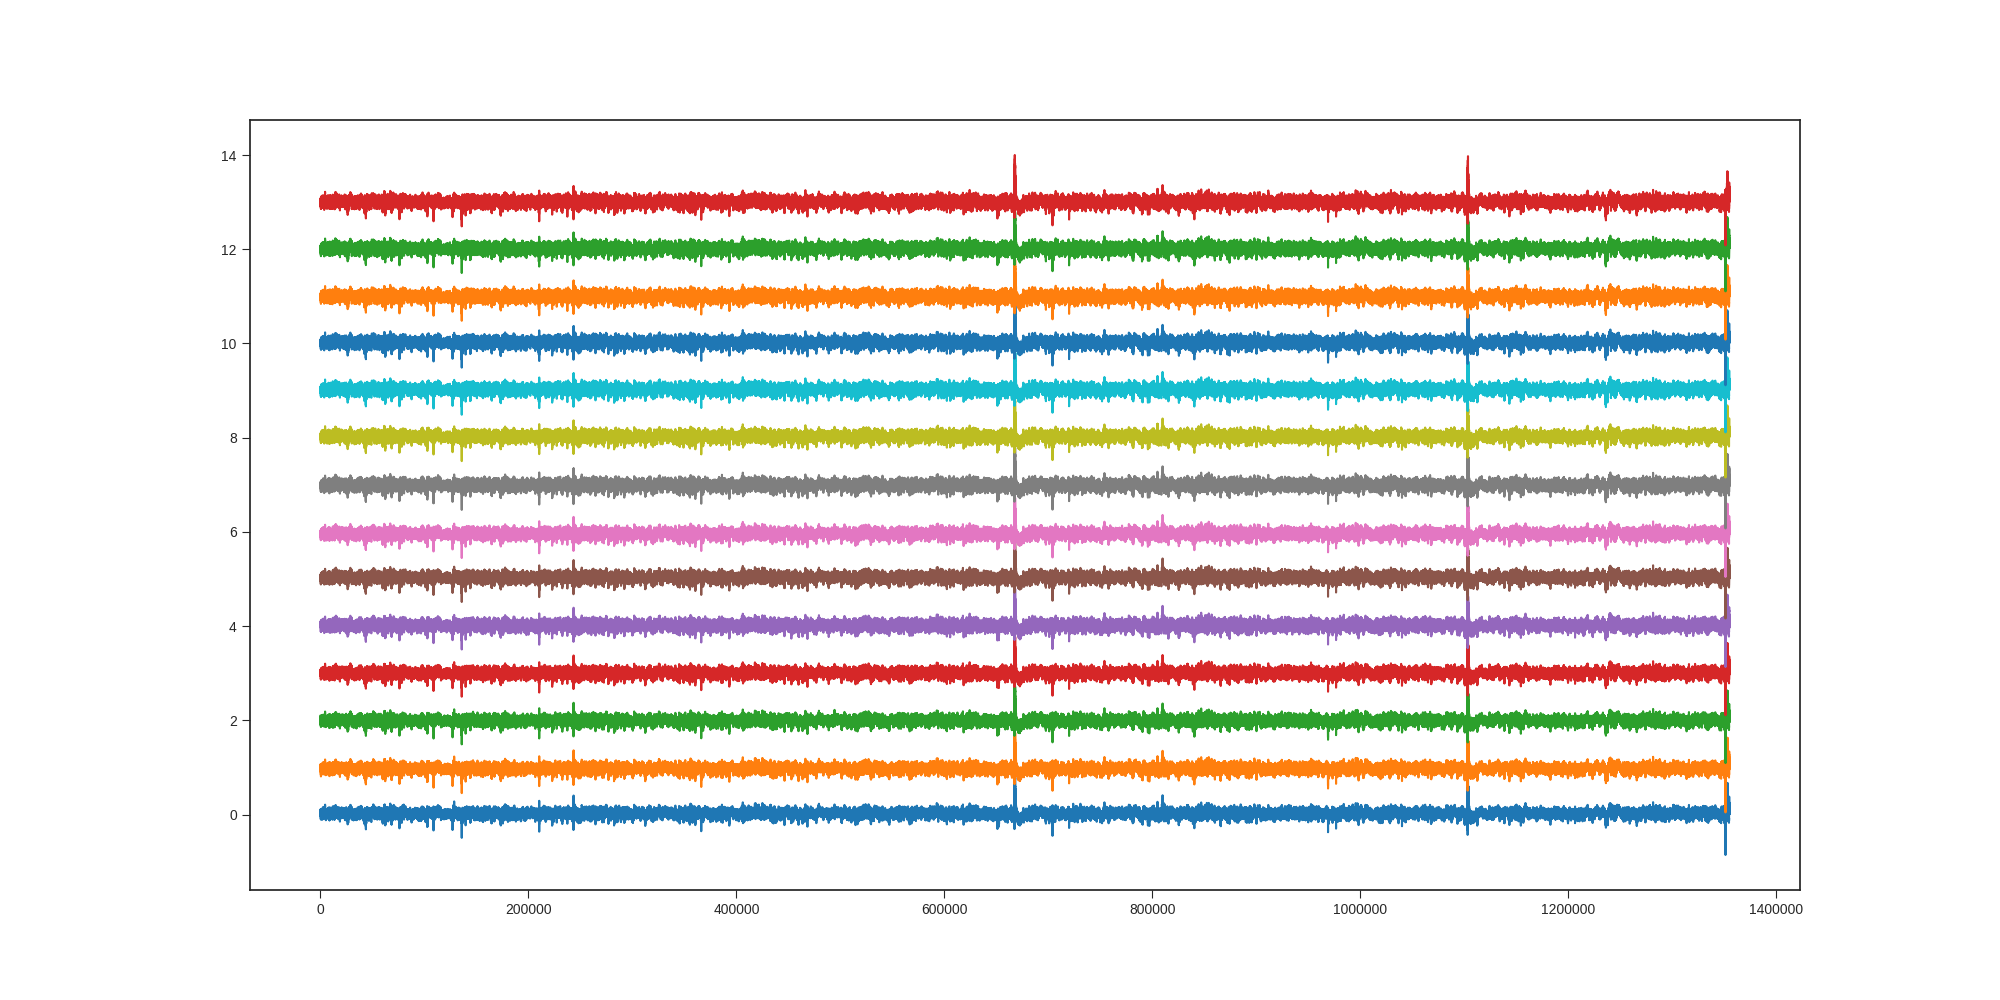

In [9]:
max_y = np.max(lfp_data_ls_openbox)
plt.rcParams["figure.figsize"] = (20,10)
for c in range(len(channel1)):
    y = lfp_data_ls_ltr[:, c] / max_y
    plt.plot(y + c)

#plt.savefig('lfp_data_ls.png', dpi=300)

<IPython.core.display.Javascript object>


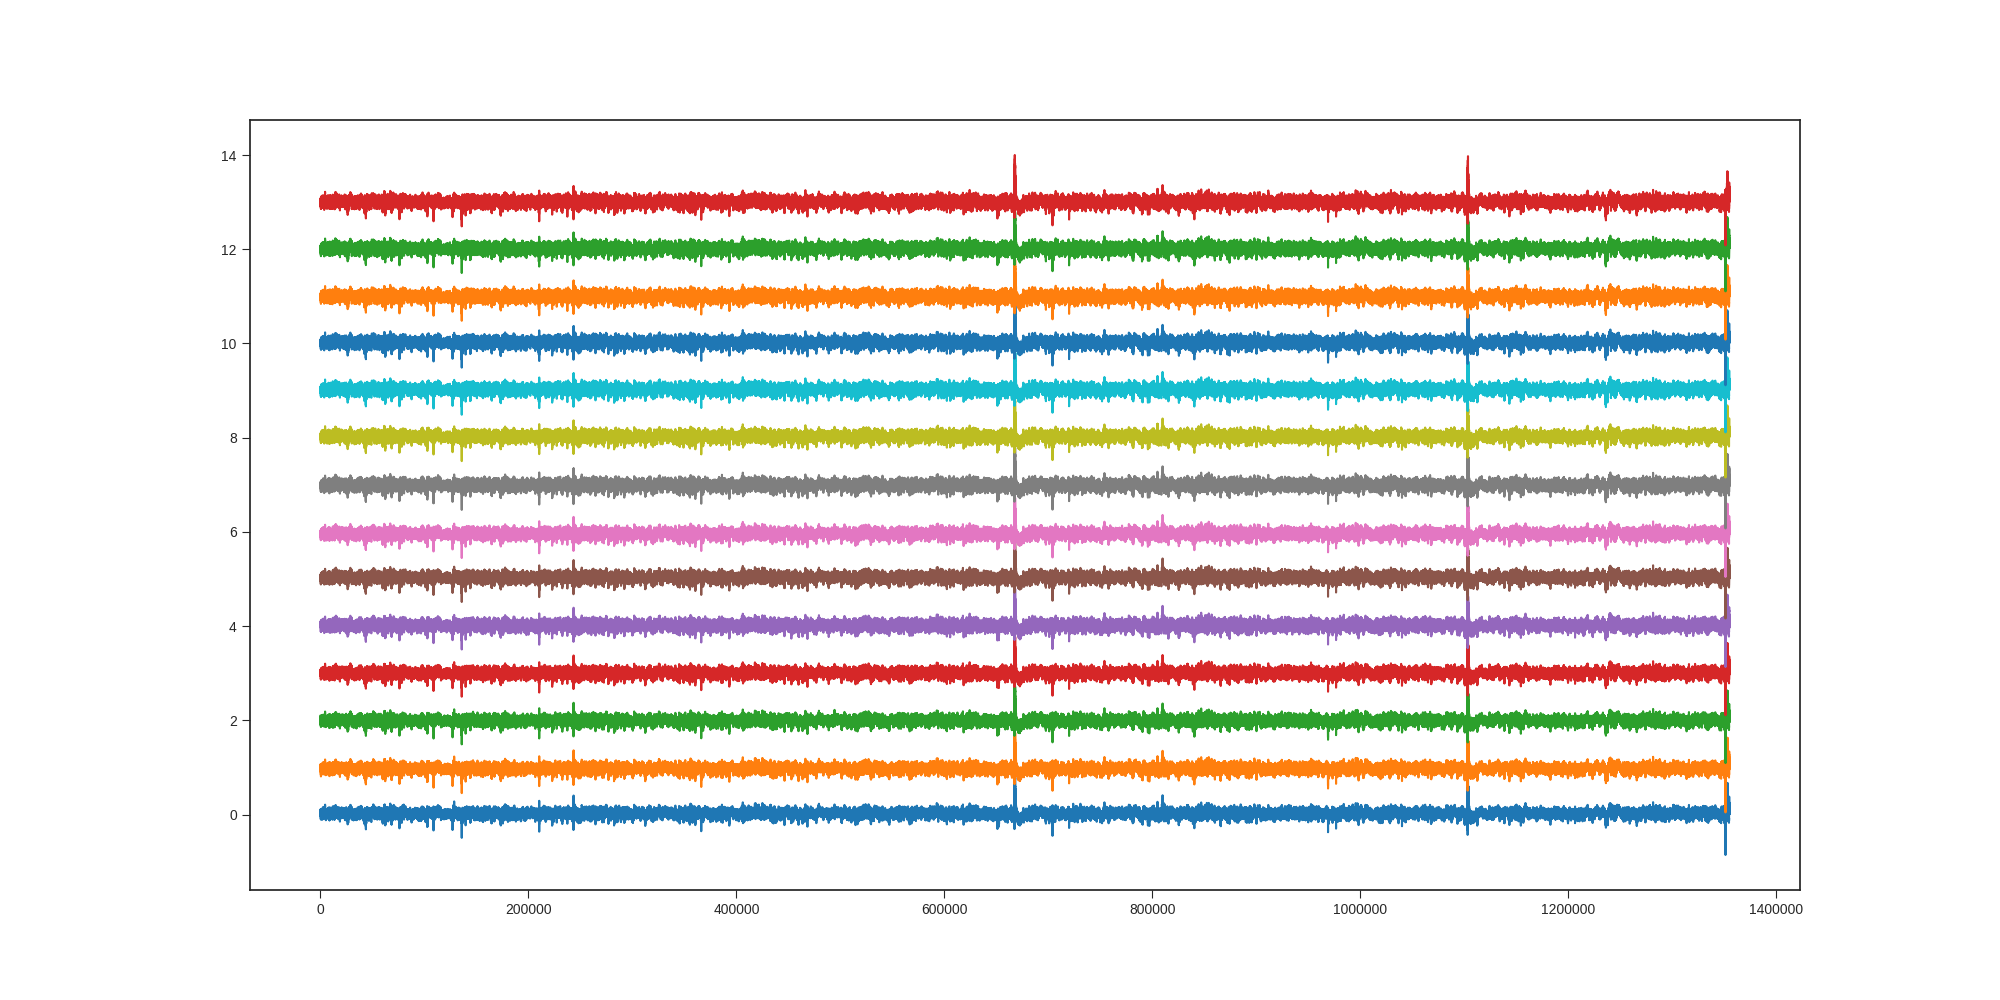

In [10]:
max_y = np.max(lfp_data_ls_ltr)
for c in range(len(channel1)):
    signal = lfp_data_ls_ltr[:, c] / max_y
    plt.plot( signal+c)
    

In [135]:
# theta = fklab.signals.filter.filter.apply_filter(lfp_data_ls, (6,12), axis=0,  fs=fs)
# max_y = np.max(theta)
# for c in range(len(channel1)):
#     signal = theta[:, c] / max_y
#     plt.plot(signal + c)

In [11]:
print(signal)
psd, f, _, options = mt.mtspectrum(signal, fs=fs, window_size=0.8)

[-0.07827789 -0.08610568 -0.01761252 ...  0.01956947  0.02152642
  0.01761252]


In [12]:
# multi-tapered spectrum of signal separately for 2 second windows
psd, f, _, options = mt.mtspectrum(signal, fs=fs, window_size=0.8, average=False )

In [13]:
max_yob = np.max(lfp_data_ls_openbox)
max_ylt = np.max(lfp_data_ls_ltr)
max_ysl = np.max(lfp_data_ls_sleep)

for c in range(len(channel)):
    signalopb = lfp_data_ls_openbox[:, c] / max_yob
    signalltr = lfp_data_ls_ltr[:, c] / max_ylt
    signalsl = lfp_data_ls_sleep[:, c] / max_ysl
    
    

<IPython.core.display.Javascript object>


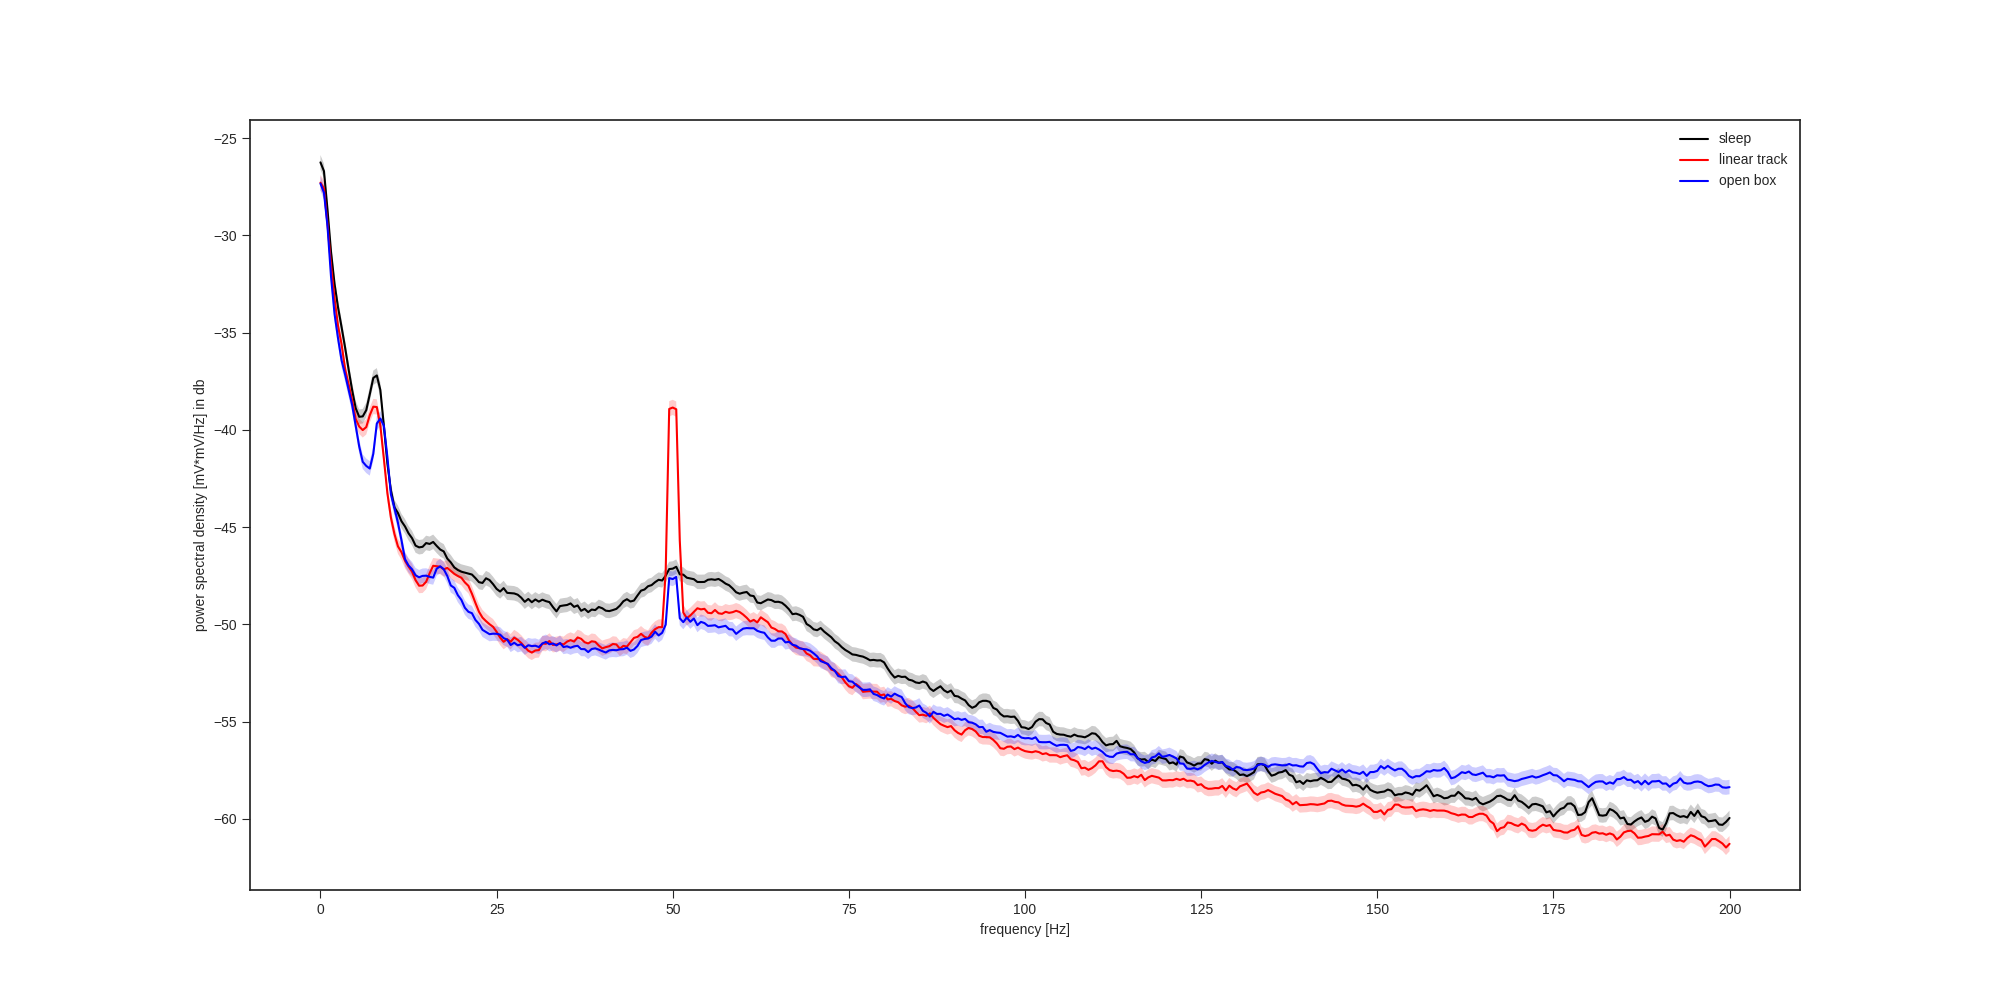

In [14]:
ax = plt.gca()
_, a1, _ = mt.plot_spectrum(signalsl, fs=fs, window_size=2, bandwidth=1, error='theory',
                               pvalue=0.01, db=True, units='mV', color='black', fpass=[0,200],
                            axes=ax)
_, a2, _ = mt.plot_spectrum(signalltr, fs=fs, window_size=2, bandwidth=1, error='theory',
                                    pvalue=0.01, db=True, units='mV', color='red', fpass=[0,200],
                            axes=ax)
_, a3, _ = mt.plot_spectrum(signalopb, fs=fs, window_size=2, bandwidth=1, error='theory',
                                    pvalue=0.01, db=True, units='mV', color='blue', fpass=[0,200],
                            axes=ax)

plt.legend([a1[1], a2[1], a3[1]], ['sleep', 'linear track', 'open box'])
# plt.savefig('powerspectrumALL28_11.png')


In [108]:
psd, t, f, _, options = mt.mtspectrogram(signal, fs=fs, start_time=0, window_size=0.8,
                                         window_overlap=0.5, bandwidth=10)

In [142]:
axes, artists, _ = mt.plot_spectrogram(signalopb, fs=fs, window_size=0.8, bandwidth=10,
                                       window_overlap=0.5, db=True, units='mV')


In [168]:
axes, artists, _ = mt.plot_spectrogram(signalltr, fs=fs, window_size=0.8, bandwidth=10,
                                       window_overlap=0.5, db=True, units='mV', fpass=[0,100])


<IPython.core.display.Javascript object>


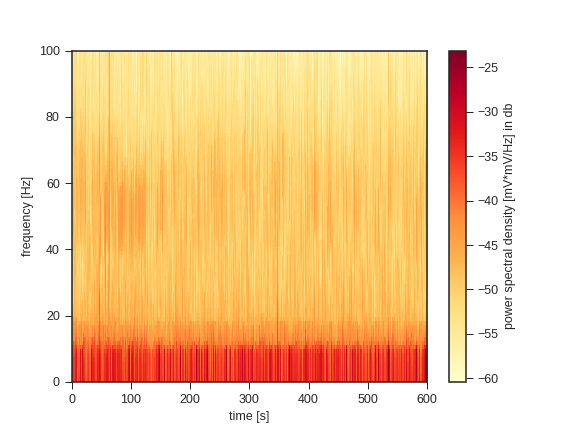

In [174]:
axes, artists, _ = mt.plot_spectrogram(signalsl, fs=fs, window_size=0.8, bandwidth=10,
                                       window_overlap=0.5, db=True, units='mV', fpass=[0,100])



In [22]:
myKsDir = '/media/kasia/K/Neuropixeldata/Th1_ca3_9/catgt_29112019_g0/';
lfpD = dir(fullfile(myKsDir, '*.lf.bin')); 
lfpFilename = fullfile(myKsDir, lfpD(1).name);

# lfp_data

# lfpFs = 2500;  
# nChansInFile = 385;  

# [lfpByChannel, allPowerEst, F, allPowerVar] = ...
# lfpBandPower(lfpFilename, lfpFs, nChansInFile, []);

# chanMap = readNPY(fullfile(myKsDir, 'channel_map.npy'));
# nC = length(chanMap);

# allPowerEst = allPowerEst(:,chanMap+1); % now nChans x nFreq

# % plot LFP power
# dispRange = [0 100]; % Hz
# marginalChans = [10:50:nC];
# freqBands = {[1.5 4], [4 10], [10 30], [30 80], [80 200]};

# plotLFPpower(F, allPowerEst, dispRange, marginalChans, freqBands);

NameError: name 'loadKSdir' is not defined